https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Admin\\Desktop\\Data') #Personal
#os.chdir('C:\\Users\\Administrator\\Desktop\\Data')
from sklearn.feature_selection import VarianceThreshold

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
hp=pd.read_csv('HousePricingDataset.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


hp=hp1.iloc[:1000,:]
hp.head()
hp.shape

In [3]:
## Find out the columns which has missing values
[col for col in hp.columns if hp[col].isnull().sum()>0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Replacing the null values

In [4]:
## Since NaN represents there is no frotange to the property hence representing as 0
hp['LotFrontage'].fillna(value=0,inplace=True)
## Replacing the null values with 'No Alley Access'
hp['Alley'].fillna(value='No Alley Access',inplace=True)
## Replacing null values with None
hp['MasVnrType'].fillna(value='None',inplace=True)
## Replacing the null values of 'MasVnrArea'  with 0 as there is MasVnrType is none
hp['MasVnrArea'].fillna(value=0,inplace=True)
hp['BsmtQual'].fillna(value='No Basement',inplace=True)
hp['BsmtCond'].fillna(value='No Basement',inplace=True)
hp['BsmtExposure'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType1'].fillna(value='No Basement',inplace=True)
hp['BsmtFinType2'].fillna(value='No Basement',inplace=True)
hp['GarageType'].fillna(value='No Garage',inplace=True)
hp['GarageYrBlt'].fillna(value='9999',inplace=True)
hp['GarageFinish'].fillna(value='No Garage',inplace=True)
hp['GarageQual'].fillna(value='No Garage',inplace=True)
hp['GarageCond'].fillna(value='No Garage',inplace=True)
hp['FireplaceQu'].fillna(value='No FirePlace',inplace=True)
hp['Electrical'].fillna(value='None',inplace=True)
hp['Fence'].fillna(value='No Fence',inplace=True)
hp['PoolQC'].fillna(value='No Pool',inplace=True)
hp['MiscFeature'].fillna(value='None',inplace=True)

## Function to Identify the unique value columns

In [5]:
#len(hp['customerID'])/(hp.shape[0])
def unique_columns(dataset):
    total_rows=dataset.shape[0]
    columns=dataset.columns
    unique_columns=[]
    for i in columns:
        if len(dataset[i].unique())==total_rows:
            unique_columns.append(i)
    return unique_columns

In [6]:
unique_columns=unique_columns(hp)
unique_columns

['Id']

In [7]:
hp.drop(unique_columns,axis=1,inplace=True)

## Type Conversions

In [8]:
hp['MSSubClass']=hp['MSSubClass'].astype('object')
hp['OverallQual']=hp['OverallQual'].astype('object')
hp['OverallCond']=hp['OverallCond'].astype('object')

## Numeric and Categorical Columns Columns

In [9]:
hp_numeric=hp.select_dtypes(include=['int64','float64'])
hp_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
hp_categorical=hp.select_dtypes(include=['object'])
hp_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No FirePlace,Attchd,2003,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


## Constant Features

In [11]:
constant=VarianceThreshold(threshold=0)
constant.fit(hp_numeric)
constant.get_support()
non_constant_numeric=hp_numeric.columns[constant.get_support()]

In [12]:
Non_constant_categorical=[i for i in hp_categorical.columns if len(hp_categorical[i].unique())!=1]

In [13]:
hp_col=list(non_constant_numeric)+list(Non_constant_categorical)
hp=hp[hp_col]

In [14]:
hp.shape

(1460, 80)

## Quasi Constant Features

In [15]:
quasiconstant=VarianceThreshold(threshold=0.05)
quasiconstant.fit(hp_numeric)
quasiconstant.get_support()
non_quasi_constant_numeric=hp_numeric.columns[quasiconstant.get_support()]
print(non_quasi_constant_numeric)
#hp=hp[non_quasi_constant_numeric]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [16]:
def quasi_constant_categorical(dataset):
    columns=dataset.columns
    cat_columns=[]
    for i in columns:
        #a=(dataset[i].value_counts()/np.float(len(dataset[i]))).sort_values(ascending=False)[:1]
        #index=(dataset[i].value_counts()/np.float(len(dataset[i]))).sort_values(ascending=False)[:1].index
        if list((hp_categorical[i].value_counts()/np.float(len(hp_categorical[i]))).sort_values(ascending=False)[:1])[0]<=0.95:
            cat_columns.append(i) 
    return cat_columns

In [17]:
non_quasi_constant_categorical=quasi_constant_categorical(hp_categorical)
final_non_quasi_constant=non_quasi_constant_categorical+list(non_quasi_constant_numeric)
hp=hp[final_non_quasi_constant]

In [18]:
hp.shape

(1460, 72)

In [19]:
#y=hp['SalePrice']
#hp.drop('SalePrice',axis=1, inplace=True)

## Correlation between the input variables

In [20]:
def correlation(dataset,threshold,Column):
    cor_mat=dataset.corr()
    cor_mat.drop(Column,axis=1,inplace=True)
    cor_mat.drop(Column,axis=0,inplace=True)
    correlated_variables=set()
    for i in range(len(cor_mat.columns)):
        for j in range(i):
            if abs(cor_mat.iloc[i,j])>threshold:
                colname=cor_mat.columns[i]
                correlated_variables.add(colname)
    return correlated_variables

In [21]:
correlated_variables=correlation(hp_numeric,0.65,'SalePrice')
correlated_variables

{'1stFlrSF', 'GarageArea', 'GrLivArea', 'TotRmsAbvGrd'}

In [22]:
hp.drop(labels=correlated_variables,axis=1,inplace=True)
hp_numeric.drop(labels=correlated_variables,axis=1,inplace=True)

## Second approach to identify the correlated features and groups

cor_mat=hp_numeric.corr()
cor_mat=cor_mat.abs().unstack()
cor_mat=cor_mat.sort_values(ascending=False)
cor_mat=cor_mat[cor_mat>=0.8]
cor_mat=cor_mat[cor_mat<1]
cor_mat=pd.DataFrame(cor_mat).reset_index()
cor_mat.columns=['Feature1','Feature2','correlation']
cor_mat

grouped_features_ls=[]
correlated_features=[]
for i in cor_mat['Feature1'].unique():
    if i not in grouped_features_ls:
        correlated_block=cor_mat[cor_mat['Feature1']==i]
        grouped_features_ls=grouped_features_ls+list(correlated_block['Feature2'].unique())+[i]
        correlated_features.append(correlated_block)

hp.drop(['GarageCars','TotRmsAbvGrd','TotalBsmtSF'],axis=1,inplace=True)

### Correlation between input features and output variable ('SalePrice')

In [23]:
def correlation(dataset,threshold,column):
    cor_mat=dataset.corr()
    correlated_variables=set()
    for i in cor_mat.columns:
        for j in [column]:
            if (i!=j) and (abs(cor_mat.loc[i,j])>threshold):
                correlated_variables.add(i)
    return correlated_variables

In [24]:
correlation(hp_numeric,0.65,'SalePrice')
#cor_mat.columns[0]

set()

In [25]:
hp_numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Exploratory Data Analysis

In [26]:
percentile_col={}
for i in ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']:
    percentile_col[i]={}
    for j in range(0,100):
        per=np.percentile(hp[i],j)
        percentile_col[i][j]=per

In [27]:
percentile_col_df=pd.DataFrame(percentile_col)
percentile_col_df

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,HalfBath,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,PoolArea,SalePrice,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1300.00,0.00,0.0,0.00,0.0,1.00,0.00,0.0,34900.00,0.00,0.00,0.00,1872.00,1950.00,2006.0
1,0.00,0.0,1.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,1680.00,0.00,0.0,0.00,0.0,1.00,0.00,0.0,61815.97,0.00,0.00,0.00,1899.18,1950.00,2006.0
2,0.00,0.0,1.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,2124.74,0.00,0.0,0.00,0.0,1.00,0.00,0.0,79000.00,0.00,0.00,0.00,1908.36,1950.00,2006.0
3,0.00,0.0,1.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,2522.00,0.00,0.0,0.00,0.0,1.00,0.00,0.0,82000.00,0.00,312.33,0.00,1910.00,1950.00,2006.0
4,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,3095.04,0.00,0.0,0.00,0.0,2.00,0.00,0.0,85000.00,0.00,446.48,0.00,1914.36,1950.00,2006.0
5,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,3311.70,0.00,0.0,0.00,0.0,2.00,0.00,0.0,88000.00,0.00,519.30,0.00,1916.00,1950.00,2006.0
6,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,1.0,0.0,3862.52,0.00,0.0,0.00,0.0,2.00,0.00,0.0,91500.00,0.00,546.00,0.00,1919.54,1950.00,2006.0
7,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,1.0,0.0,4119.56,0.00,0.0,0.00,0.0,2.00,0.00,0.0,96565.00,0.00,576.00,0.00,1920.00,1950.00,2006.0
8,0.00,0.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,1.0,1.0,0.0,4426.00,0.00,0.0,0.00,0.0,3.00,0.00,0.0,100000.00,0.00,600.00,0.00,1920.00,1950.00,2006.0
9,0.00,0.0,2.0,0.00,0.00,0.0,36.62,0.00,0.0,1.0,1.0,0.0,4576.89,0.00,0.0,0.00,0.0,3.00,0.00,0.0,103724.00,0.00,624.00,0.00,1922.31,1950.00,2006.0


#Verifying the Lot Area

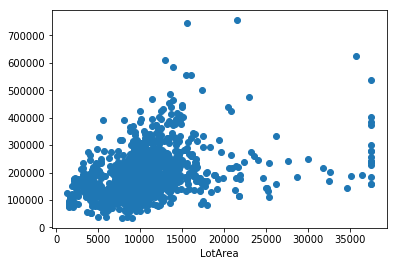

(array([ 54.,  77., 139., 541., 432., 139.,  33.,  20.,   3.,  22.]),
 array([ 36.05551275,  51.83233491,  67.60915708,  83.38597924,
         99.1628014 , 114.93962356, 130.71644572, 146.49326788,
        162.27009004, 178.0469122 , 193.82373436]),
 <a list of 10 Patch objects>)

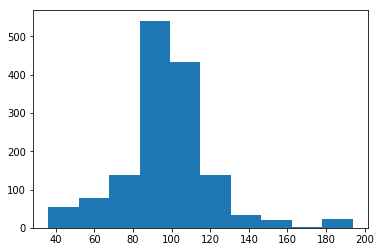

In [28]:
hp.loc[hp['LotArea']>37567.64,'LotArea']=37567.64
plt.scatter(hp['LotArea'],hp['SalePrice'])
plt.xlabel('LotArea')
plt.show()
plt.hist(np.sqrt(hp['LotArea']))

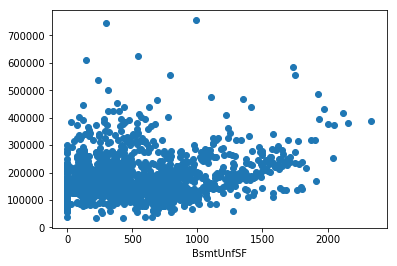

In [29]:
#hp.loc[hp['LotArea']>21571.80,'LotArea']=21571.80
plt.scatter(hp['BsmtUnfSF'],hp['SalePrice'])
plt.xlabel('BsmtUnfSF')
plt.show()


hp['BsmtUnfSF']=np.sqrt(hp['BsmtUnfSF'])

bins_lotfontage = [0,21,50, 75, 100, 313]
labels_lotfontage = [1,2,3,4,5]
hp['LotFrontage_binned'] = pd.cut(hp['LotFrontage'], bins=bins_lotfontage, labels=labels_lotfontage)

bins_MasVnrArea = [0,21,50, 75, 100, 313]
labels_MasVnrArea = [1,2,3,4,5]
hp['MasVnrArea_binned'] = pd.cut(hp['MasVnrArea'], bins=bins_MasVnrArea, labels=labels_MasVnrArea)

hp.loc[hp['MasVnrArea']>400,'MasVnrArea']=400

numeric_columns=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Age']
for i in numeric_columns:
    print('Column ',i)
    sns.boxplot(hp[i])
    plt.show()
    sns.distplot(hp[i])
    plt.show()
    plt.hist(hp[i])
    plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns

hp_categorical.columns

#plt.barplot(hp['MSSubClass'],hp['MSZoning'],width=0.5, color="blue")
sns.barplot(hp['MSSubClass'],hp['MSZoning'])

sns.FacetGrid(hp_categorical,hue='Street',size=3)\
    .map(sns.barplot,'MSSubClass','MSZoning')\
    .add_legend();
plt.show()

In [30]:
#for i in hp_categorical.columns:
#    sns.boxplot(hp[i],y)
#    plt.show()

In [31]:
## After Exploratory Data Analysis on the data based on boxplots
hp.drop(['LotShape','LotConfig','LandSlope','Functional'],axis=1,inplace=True)

In [32]:
hp.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

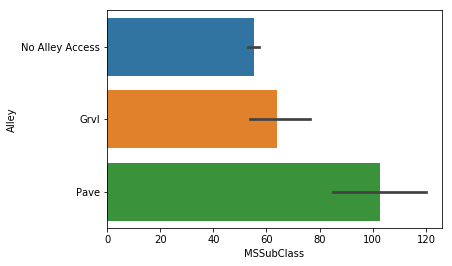

In [33]:
sns.barplot(hp['MSSubClass'],hp['Alley'])

In [34]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
ord_encoding=defaultdict(LabelEncoder)
ordinal_columns=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','Electrical','KitchenQual','FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive', 'Fence']
for i in ordinal_columns:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(ord_encoding[i].fit_transform(hp[i]))
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)
    

In [35]:
columns=['Exterior1st', 'Exterior2nd']
j=0
for i in range(len(hp['Exterior1st'])):
    if hp['Exterior1st'][i]!=hp['Exterior2nd'][i]:
        j+=1
print('total # of rows where the values in Exterior1st, Exterior2nd is ',j)
hp.drop('Exterior2nd',axis=1,inplace=True)

total # of rows where the values in Exterior1st, Exterior2nd is  215


In [36]:
columns=['MSSubClass','MSZoning','Neighborhood','HouseStyle','Condition1','SaleType','Foundation','Exterior1st']
Nominal_Class_dict={}
for i in columns:
    Percentages=(hp[i].value_counts()/hp[i].value_counts().sum())
    Nominal_Class_dict[i]={}
    for j in Percentages.index:
        Nominal_Class_dict[i][j]=Percentages[j]
   
    
Nominal_Class_dict

{'Condition1': {'Artery': 0.03287671232876712,
  'Feedr': 0.05547945205479452,
  'Norm': 0.863013698630137,
  'PosA': 0.005479452054794521,
  'PosN': 0.013013698630136987,
  'RRAe': 0.007534246575342466,
  'RRAn': 0.01780821917808219,
  'RRNe': 0.0013698630136986301,
  'RRNn': 0.003424657534246575},
 'Exterior1st': {'AsbShng': 0.0136986301369863,
  'AsphShn': 0.0006849315068493151,
  'BrkComm': 0.0013698630136986301,
  'BrkFace': 0.03424657534246575,
  'CBlock': 0.0006849315068493151,
  'CemntBd': 0.04178082191780822,
  'HdBoard': 0.15205479452054796,
  'ImStucc': 0.0006849315068493151,
  'MetalSd': 0.1506849315068493,
  'Plywood': 0.07397260273972603,
  'Stone': 0.0013698630136986301,
  'Stucco': 0.017123287671232876,
  'VinylSd': 0.3527397260273973,
  'Wd Sdng': 0.1410958904109589,
  'WdShing': 0.01780821917808219},
 'Foundation': {'BrkTil': 0.1,
  'CBlock': 0.43424657534246575,
  'PConc': 0.44315068493150683,
  'Slab': 0.01643835616438356,
  'Stone': 0.00410958904109589,
  'Wood': 0

In [37]:
for i in columns:
    for j in range(len(hp[i])):
        value_org=hp[i][j]
        if Nominal_Class_dict[i][value_org]>0.05:
            hp[i][j]=value_org
        else:
            hp[i][j]='New'
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [38]:
## This code is for a single columns
#MSSubClass_dict={}
#for i in MsSubClass_Percentages.index:
#        MSSubClass_dict[i]=MsSubClass_Percentages[i]

In [39]:
for i in columns:
    print(hp[i].unique())

[60 20 'New' 50 120]
['RL' 'RM' 'New']
['CollgCr' 'New' 'Somerst' 'OldTown' 'Sawyer' 'NridgHt' 'NAmes' 'Edwards'
 'Gilbert']
['2Story' '1Story' '1.5Fin' 'New']
['Norm' 'Feedr' 'New']
['WD' 'New']
['PConc' 'CBlock' 'BrkTil' 'New']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'New' 'Plywood']


In [40]:
hp['Remodelled']=hp['YearRemodAdd'] - hp['YearBuilt']

In [41]:
hp['Hand']=hp['YrSold']-hp['YearBuilt']

In [42]:
for i in range(len(hp['Hand'])):
    if hp['Hand'][i]==0:
        hp['Hand']='First'
    else:
        hp['Hand']='Second'

In [43]:
for i in range(len(hp['Remodelled'])):
    if  hp['Remodelled'][i]==0:
        hp['Remodelled'][i]='Old'
    else:
        hp['Remodelled'][i]='Remodelled'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [44]:
from sklearn.preprocessing import LabelBinarizer
from collections import defaultdict
import pandas as pd
encoding=defaultdict(LabelBinarizer)
columns_nominal=['Remodelled','Hand','Alley', 'LandContour','BldgType','RoofStyle', 'GarageType','MasVnrType','CentralAir','SaleCondition','MSZoning','Neighborhood','Exterior1st','HouseStyle','Condition1','SaleType','Foundation']
for i in columns_nominal:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding[i].fit_transform(hp[i]))
    test_column=d.columns.values
    list1=[i+'_'+str(j) for j in test_column]
    d.columns=list1
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)

In [45]:
hp['Age']=2018-hp['YearBuilt']

In [46]:
hp.drop(['MSSubClass','YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [47]:
#X_train.isnull().sum()
#hp.drop(['LotFrontage_binned','MasVnrArea_binned'],axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import MinMaxScaler
#Minmax=MinMaxScaler(feature_range=(0, 1), copy=True)
from collections import defaultdict
encoding=defaultdict(MinMaxScaler)
columns_integer=['LotArea','BsmtUnfSF','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','2ndFlrSF','WoodDeckSF','OpenPorchSF','Age']
for i in columns_integer:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding[i].fit_transform(pd.DataFrame(hp[i])))
    
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)


In [49]:
from sklearn.preprocessing import MinMaxScaler
#Minmax=MinMaxScaler(feature_range=(0, 1), copy=True)
from collections import defaultdict
encoding_saleprice=defaultdict(MinMaxScaler)
columns_integer=['SalePrice']
for i in columns_integer:
    encoded_df=pd.DataFrame()
    d=pd.DataFrame(encoding_saleprice[i].fit_transform(pd.DataFrame(hp[i])))
    
    #test_column=d.columns.values
    #list1=[i+'_'+str(j) for j in test_column]
    d.columns=[i]
    encoded_df=pd.concat([encoded_df,d],axis=1)
    hp.drop(i,axis=1, inplace=True)
    hp=pd.concat([hp,encoded_df],axis=1)


In [50]:
X_train_backup=hp.copy()

In [51]:
hp['SalePrice'].max()

1.0

In [52]:
y=hp['SalePrice']
hp.drop('SalePrice',axis=1,inplace=True)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(hp,y,test_size=0.3,random_state=34)
X_train=X_train.reset_index()
X_test=X_test.reset_index()

## RBF

In [112]:
from sklearn.model_selection import GridSearchCV
reg_svm=SVR()
parameters={'C':[0.00001,0.0001,0.001, 0.01, 0.1, 1, 10],'gamma':[0.00001,0.0001,0.001, 0.01, 0.1, 1]}
gcv_svr=GridSearchCV(reg_svm,parameters,scoring='neg_mean_squared_error',cv=5)
gcv_svr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [81]:
# SVR
from sklearn.svm import SVR
reg_svm=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
reg_svm.fit(X_train,y_train)
y_pred_test=reg_svm.predict(X_test)
y_pred_train=reg_svm.predict(X_train)
from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())

[LibSVM]
r2 square test 0.3918431974365535
r2 square train 0.42914947550833715

Train Results
     actual_train  predicted_train        errors
512      129900.0    177661.559507 -47761.559507
343      266000.0    259483.437326   6516.562674
290      233230.0    203854.585162  29375.414838
163      103200.0    169902.790990 -66702.790990
234      216500.0    175212.426954  41287.573046

Test Results
      actual_test  predicted_test        errors
1399     137450.0   182597.117749 -45147.117749
578      146000.0   163620.750679 -17620.750679
318      260000.0   234796.815001  25203.184999
1340     123000.0   173722.376721 -50722.376721
654      350000.0   310856.875335  39143.124665


## linear

from sklearn.model_selection import GridSearchCV
reg_svm=SVR()
parameters={'C':[0.00001,0.0001,0.001, 0.01, 0.1, 1, 10],'gamma':[0.00001,0.0001,0.001, 0.01, 0.1, 1],'kernel':['linear','rbf']}
gcv_svr=GridSearchCV(reg_svm,parameters,scoring='neg_mean_squared_error',cv=5)
gcv_svr.fit(X_train,y_train)

In [57]:
## Best Parameters
len(reg_svm.coef_[0])

113

In [80]:
## a=reg_svm.coef_[0].ravel()
a
top_positive_coefficients = np.argsort(reg_svm.coef_)[-20:]
top_positive_coefficients

array([[100,  44,  95,  10,  92,  85,  32,  45,  20, 101, 104,  40,  49,
         58,  88,  43,  81, 110,  83,  89,  75,  74,  79,  84,  68,  64,
         37,  63, 111,  93,  94, 108,   7,  54,  29,  31,  30,  70,  50,
         19,  98,   6,   8, 106,  56,  72,  27,  55,  22, 109,  69,  16,
         17,  38, 105,   3,  14,   1,   0,  62,  36,  15,   2,  13,  82,
         11,  12,  26,  61,  34,  33,  87,  76,  59,  52,  28,  57,  21,
         97,  41,  25, 107,  51,  18,  39,  24,  67,  47,  23,  71,   4,
        102,  77,  60,  80,  53,   5,  65,  86,  46,  78,  35,  42,  73,
         48,  96,   9, 103,  66,  90,  99,  91, 112]], dtype=int64)

In [ ]:
## Random Forest

In [ ]:
# SVR
from sklearn.svm import SVR
reg_svm=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)
reg_svm.fit(X_train,y_train)
y_pred_test=reg_svm.predict(X_test)
y_pred_train=reg_svm.predict(X_train)
from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())

In [90]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
RFR.feature_importances_
RFR.fit(X_train,y_train)
y_pred_test=RFR.predict(X_test)
y_pred_train=RFR.predict(X_train)
from sklearn.metrics import r2_score
print('\nr2 square test',r2_score(y_test,y_pred_test))
print('r2 square train',r2_score(y_train,y_pred_train))

print('\nTrain Results')
output_train=pd.DataFrame({'actual_train':y_train,'predicted_train':y_pred_train})
output_train['actual_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['actual_train']))
output_train['predicted_train']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_train['predicted_train']))
output_train['errors']=output_train['actual_train']-output_train['predicted_train']
print(output_train.head())

print('\nTest Results')
output_test=pd.DataFrame()
output_test=pd.DataFrame({'actual_test':y_test,'predicted_test':y_pred_test})
output_test['actual_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['actual_test']))
output_test['predicted_test']=encoding_saleprice['SalePrice'].inverse_transform(pd.DataFrame(output_test['predicted_test']))
output_test['errors']=output_test['actual_test']-output_test['predicted_test']
print(output_test.head())


r2 square test 0.7644043677189821
r2 square train 0.9715742800407939

Train Results
     actual_train  predicted_train    errors
512      129900.0        129870.25     29.75
343      266000.0        295332.40 -29332.40
290      233230.0        230524.30   2705.70
163      103200.0        103820.00   -620.00
234      216500.0        203750.00  12750.00

Test Results
      actual_test  predicted_test        errors
1399     137450.0   149020.000000 -11570.000000
578      146000.0   170350.000000 -24350.000000
318      260000.0   290160.000000 -30160.000000
1340     123000.0   114717.433333   8282.566667
654      350000.0   320590.900000  29409.100000
